In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [104]:
def plot_images(images, titles, rows, cols , info):
    fig = plt.figure(figsize=(20, 10))
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.text(0.5, 0.5, info[i], fontsize=10, color='black', ha='left', va='top')
        # ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

# Intensity Transformation

In [105]:
def LogTransform(img):
    # Apply log transform.
    c = 255/(np.log(1 + np.max(img)))
    log_transformed = c * np.log(1 + img)

    # Specify the data type.
    log_transformed = np.array(log_transformed, dtype = np.uint8)
    return np.log(img)

C:\Users\AthimetA\AppData\Local\Temp\ipykernel_13136\1558953927.py:4: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)
C:\Users\AthimetA\AppData\Local\Temp\ipykernel_13136\1558953927.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(img)
C:\Users\AthimetA\AppData\Local\Temp\ipykernel_13136\1324217057.py:6: RuntimeWarning: divide by zero encountered in log
  img_log = (np.log(imglog+1)/(np.log(1+np.max(imglog))))*255


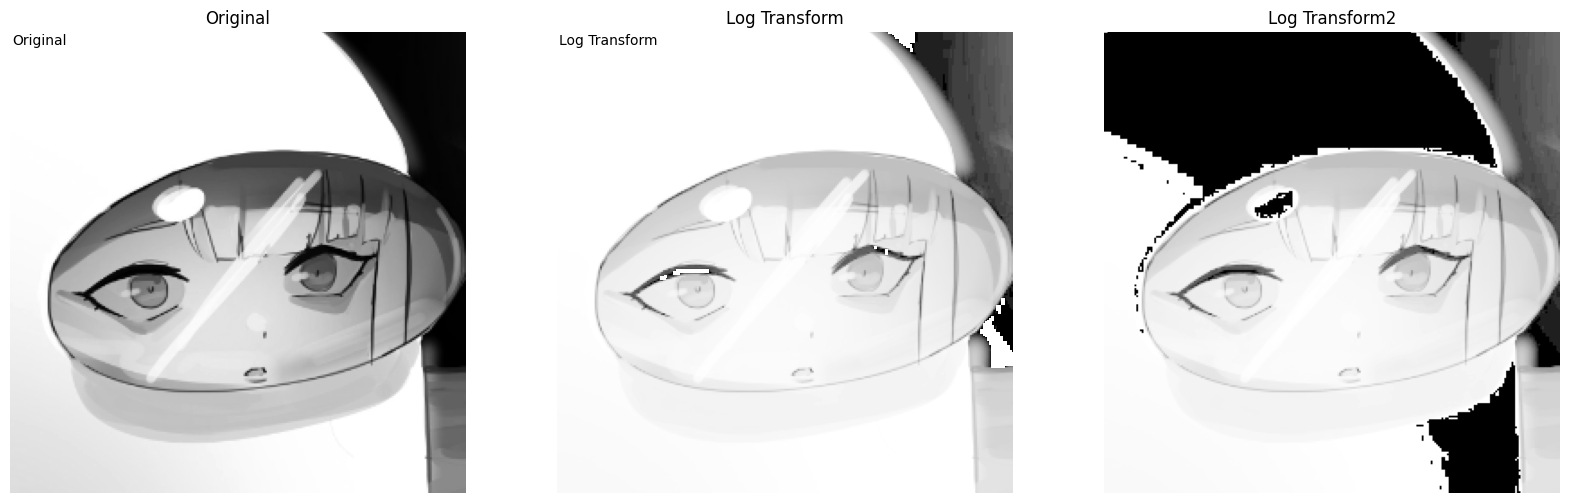

In [106]:
imglog = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
# imglog = cv2.cvtColor(imglog, cv2.COLOR_BGR2GRAY)
imglogt = LogTransform(imglog)

img_log = (np.log(imglog+1)/(np.log(1+np.max(imglog))))*255
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)


plot_images([imglog, imglogt, img_log], ['Original', 'Log Transform', 'Log Transform2'], 1, 3, ['Original', 'Log Transform', 'Log Transform2'])


# Power-Law Transformation

In [107]:
def GammaTransform(img, gamma):
    # Apply gamma transform.
    gamma_transformed = np.array(255*(img/255)**gamma, dtype = 'uint8')
    return gamma_transformed

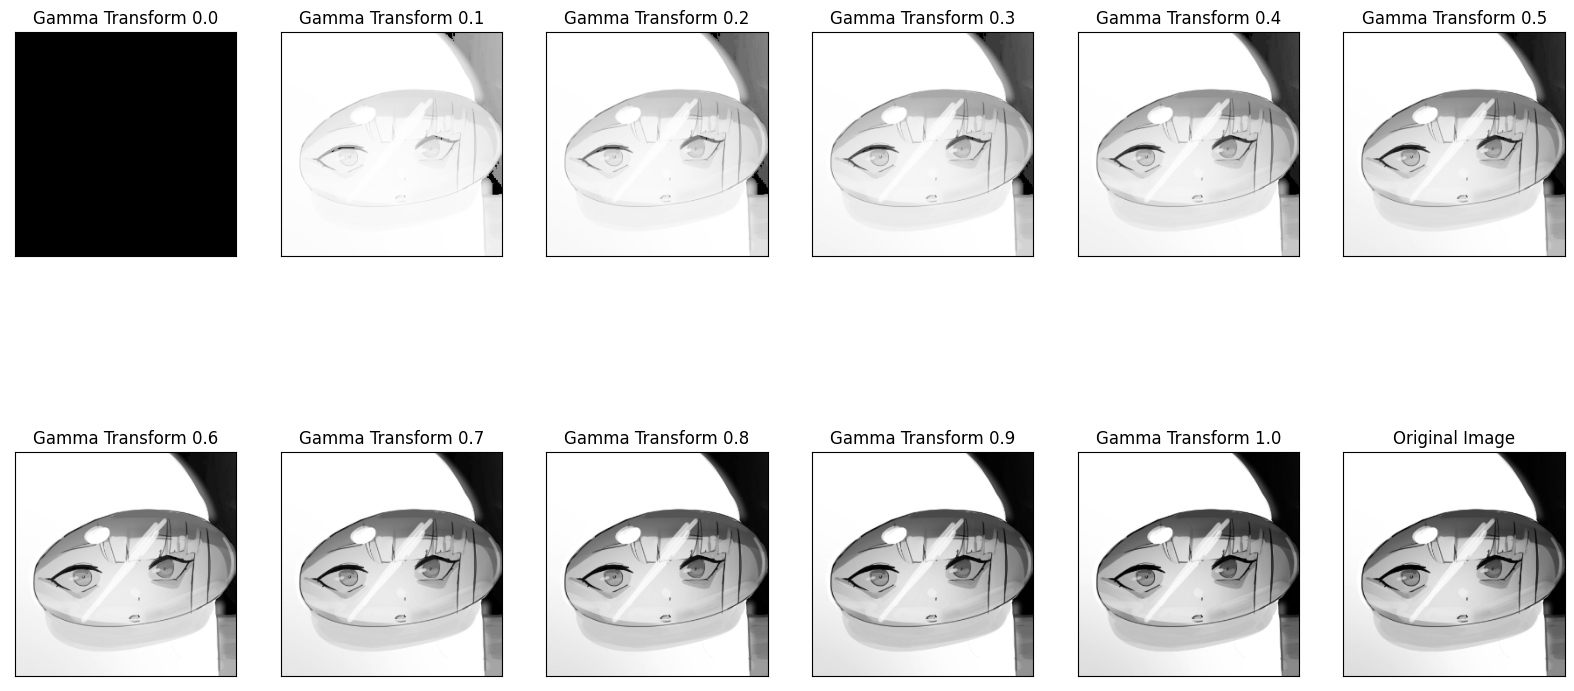

In [108]:
imggamma = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
gamma = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gammaplot = []
plt.figure(figsize=(20, 10))
for i in range(len(gamma)):
    gammaplot.append(GammaTransform(imggamma, gamma[i]))
    plt.subplot(2,6,i+1), plt.imshow(gammaplot[i], cmap = 'gray')
    plt.title('Gamma Transform '+str(gamma[i])), plt.xticks([]), plt.yticks([])
plt.subplot(2,6,12), plt.imshow(imggamma, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Piecewise-Linear Transformation Functions

<img src="../img/contrast_stretching.png" alt="contrast_stretching" width="500" height="600">

In [109]:
def PiecewiseLinearTransform(img, r1, s1, r2, s2):
    # Apply piecewise linear transform.
    # Equation 1
    # f(x) = (s1/r1)*x, 0<=x<=r1
    a = s1/r1
    b = 0
    # Equation 2
    # f(x) = ((s2-s1)/(r2-r1))*(x-r1) + s1, r1<=x<=r2
    c = (s2 - s1)/(r2 - r1)
    d = s1 - c*r1
    # Equation 3
    # f(x) = ((255-s2)/(255-r2))*(x-r2) + s2, r2<=x<=255
    e = (255 - s2)/(255 - r2)
    f = s2 - e*r2
    img = np.vectorize(lambda x: a*x + b if x <= r1 else c*x + d if x <= r2 else e*x + f)(img)
    piecewise_linear_transformed = np.array(img, dtype = np.uint8)
    return piecewise_linear_transformed

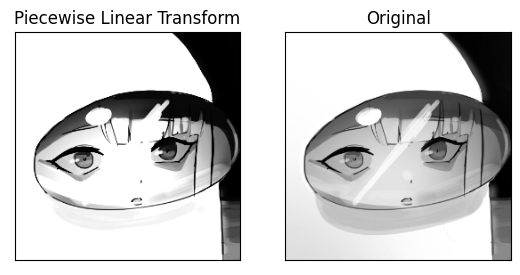

In [115]:
imgpiece = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
r1 = 70
s1 = 10
r2 = 200
s2 = 255
imgpiecet = PiecewiseLinearTransform(imgpiece, r1, s1, r2, s2)

plt.subplot(121), plt.imshow(imgpiecet, cmap = 'gray')
plt.title('Piecewise Linear Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgpiece, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

# Histrogram Equalization

In [111]:
def HistEqualization(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img2 = cdf[img]
    return img2

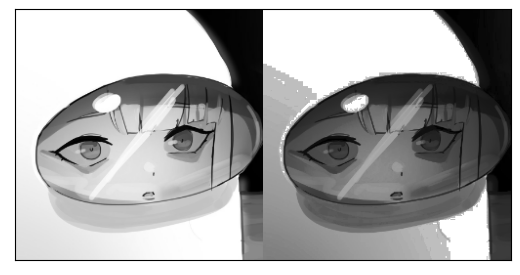

In [112]:
img = cv2.imread('../img/suscy.png', cv2.IMREAD_GRAYSCALE)
# creating a Histograms Equalization
# of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img)
  
# stacking images side-by-side
res = np.hstack((img, equ))

# plotting the images
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()


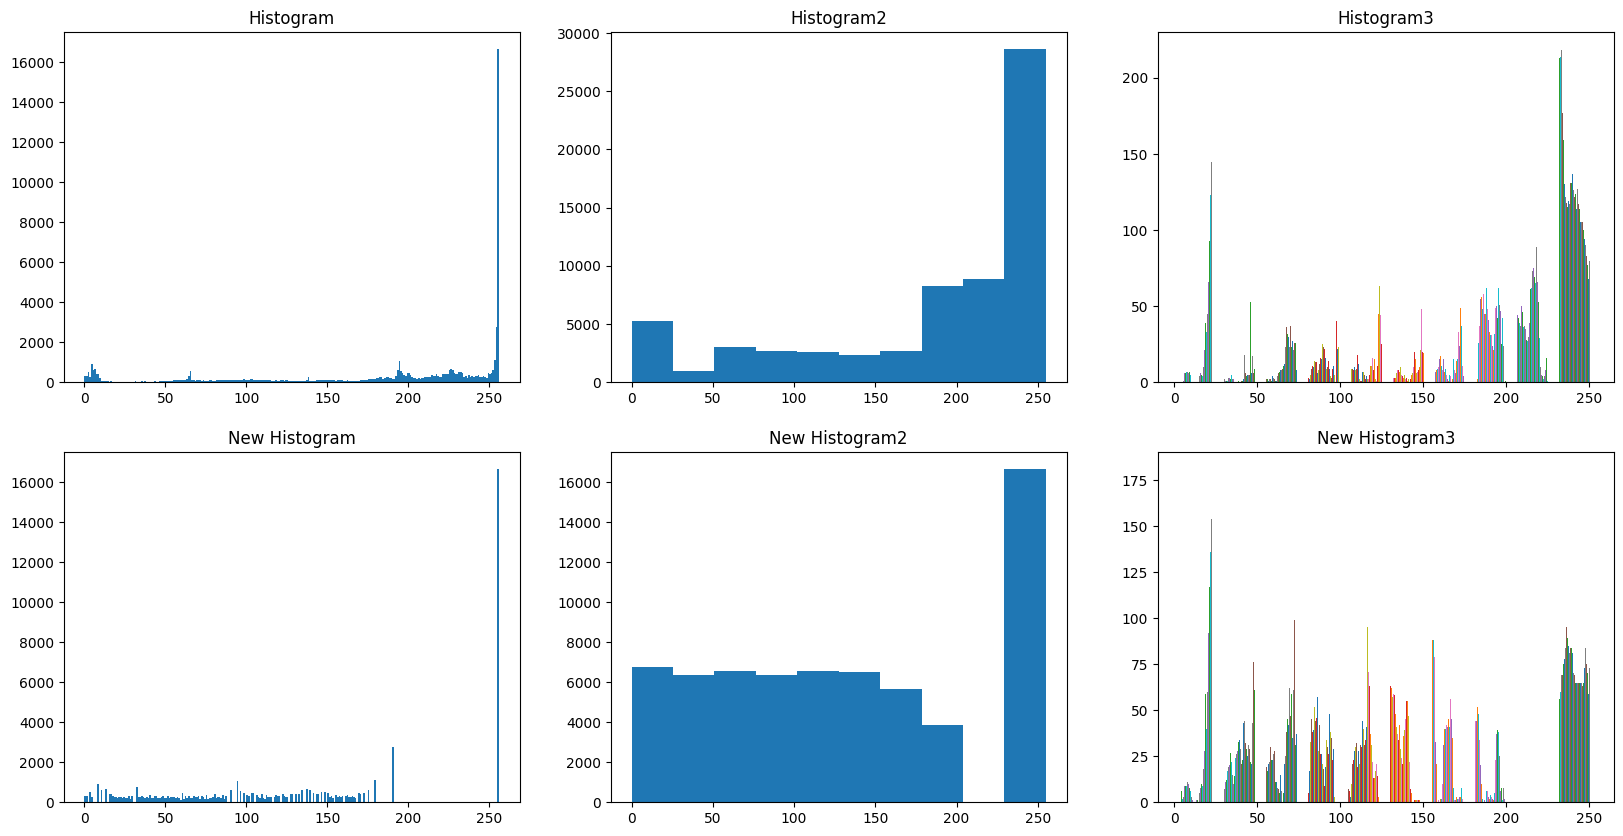

In [113]:
# plotting new histogram
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram')
plt.subplot(2,3,2)
plt.hist(img.ravel())
plt.title('Histogram2')
plt.subplot(2,3,3)
plt.hist(img)
plt.title('Histogram3')
plt.subplot(2,3,4)
plt.hist(equ.ravel(), 256, [0, 256])
plt.title('New Histogram')
plt.subplot(2,3,5)
plt.hist(equ.ravel())
plt.title('New Histogram2')
plt.subplot(2,3,6)
plt.hist(equ)
plt.title('New Histogram3')
plt.show()

# Histogram Comparison

In [121]:
def HistogramComparison(img):
    bgr_planes = cv2.split(img)
    histSize = 256
    histRange = (0, 256) # the upper boundary is exclusive
    accumulate = False
    b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
    g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
    r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
    hist_w = 512
    hist_h = 400
    bin_w = int(round( hist_w/histSize ))
    histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
    cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    for i in range(1, histSize):
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(b_hist[i]) ),
                ( 255, 0, 0), thickness=2)
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(g_hist[i]) ),
                ( 0, 255, 0), thickness=2)
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(r_hist[i]) ),
                ( 0, 0, 255), thickness=2)
    return histImage

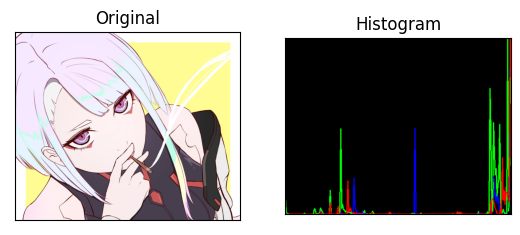

In [122]:

img = cv2.imread('../img/lucy.jpg', cv2.IMREAD_UNCHANGED)
histImage = HistogramComparison(img)

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB))
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()